In [1]:
import torch
torch.cuda.set_device(0)
print(torch.cuda.current_device())

0


In [2]:
%run ../../prepare_data.py
%run ../../architectures.py

In [3]:
batch_size = 32

In [4]:
train_loader, valid_loader, valid_dataset = rsna_dataloaders(batch_size)

In [5]:
x, y = next(iter(train_loader))

In [6]:
x.shape, y.shape

(torch.Size([32, 3, 256, 256]), torch.Size([32]))

In [13]:
model = MobileNet(width_mult=1.0, depth_mult=1.0).cuda()

In [8]:
sum(p.numel() for p in model.parameters())

2225153

CPU times: user 1min 4s, sys: 6.25 s, total: 1min 11s
Wall time: 1min 11s


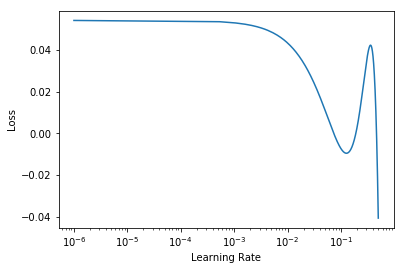

In [11]:
%%time
lrs, losses = LR_range_finder(model, train_loader, 
                              loss_fn=F.binary_cross_entropy_with_logits, 
                              binary=True, lr_high=0.5)
plot_lr(lrs, losses)

In [14]:
optimizer = create_optimizer(model, 0.07)
train_triangular_policy(model, optimizer, train_loader, valid_loader, valid_dataset,
                                           loss_fn=F.binary_cross_entropy_with_logits, 
                                           dataset='rsna', binary=True, max_lr=0.07, epochs=15)

train_loss 0.023 val_loss 101.072 val_auc_score 0.525
----End of step 0:01:37.198823
train_loss 0.275 val_loss 35.152 val_auc_score 0.419
----End of step 0:01:37.102364
train_loss 0.390 val_loss 8.248 val_auc_score 0.531
----End of step 0:01:36.998774
train_loss 0.088 val_loss 17.455 val_auc_score 0.527
----End of step 0:01:36.439648


KeyboardInterrupt: 

# Training

In [11]:
widths = [1.0, 0.75, 0.5, 0.25]
depths = [1.0, 0.7, 0.6, 0.5, 0.3, 0.2]

In [ ]:
data = []

for w in widths:
    for d in depths:
        print('width multiplier - %.3f depth multiplier - %.3f' % (w, d))
        model = MobileNet(width_mult=w, depth_mult=d).cuda()
        p = sum(p.numel() for p in model.parameters())
        optimizer = create_optimizer(model, 0.1)
        score, t = train_triangular_policy(model, optimizer, train_loader, valid_loader, valid_dataset,
                                           loss_fn=F.binary_cross_entropy_with_logits, 
                                           dataset='rsna', binary=True, max_lr=0.1, epochs=15)
        data.append([w, d, score, p, t])
        print('')

width multiplier - 1.000 depth multiplier - 1.000
train_loss 0.029 val_loss 19.674 val_auc_score 0.549
----End of step 0:01:41.731872
train_loss 0.163 val_loss 27.570 val_auc_score 0.389
----End of step 0:01:42.033404
train_loss 0.121 val_loss 145.906 val_auc_score 0.450
----End of step 0:01:41.486886
train_loss 1.139 val_loss 399.562 val_auc_score 0.511
----End of step 0:01:41.224449
train_loss 3.791 val_loss 189.413 val_auc_score 0.542
----End of step 0:01:41.078969
train_loss 3.450 val_loss 170.412 val_auc_score 0.584
----End of step 0:01:42.265765
train_loss 3.245 val_loss 318.524 val_auc_score 0.413
----End of step 0:01:41.405434
train_loss 4.110 val_loss 471.268 val_auc_score 0.428
----End of step 0:01:42.035988
train_loss 5.233 val_loss 141.611 val_auc_score 0.421
----End of step 0:01:41.985906
train_loss 2.429 val_loss 73.253 val_auc_score 0.397
----End of step 0:01:41.928575
train_loss 1.273 val_loss 59.724 val_auc_score 0.589
----End of step 0:01:43.313878
train_loss 1.195 va

train_loss 1.053 val_loss 639.074 val_auc_score 0.478
----End of step 0:01:49.567580
train_loss 9.376 val_loss 655.319 val_auc_score 0.423
----End of step 0:01:48.031294
train_loss 7.332 val_loss 292.624 val_auc_score 0.625
----End of step 0:01:47.186915
train_loss 4.332 val_loss 299.651 val_auc_score 0.465
----End of step 0:01:47.670195
train_loss 2.645 val_loss 359.130 val_auc_score 0.526
----End of step 0:01:43.098541
train_loss 3.799 val_loss 157.159 val_auc_score 0.433
----End of step 0:01:43.140610
train_loss 1.468 val_loss 218.022 val_auc_score 0.415
----End of step 0:01:40.268905
train_loss 3.122 val_loss 74.101 val_auc_score 0.580
----End of step 0:01:43.180731
train_loss 1.347 val_loss 57.686 val_auc_score 0.449
----End of step 0:01:40.294678
train_loss 1.263 val_loss 29.172 val_auc_score 0.588
----End of step 0:01:40.365134
train_loss 0.897 val_loss 15.073 val_auc_score 0.584
----End of step 0:01:40.936362
train_loss 1.286 val_loss 7.771 val_auc_score 0.541
----End of step 0

train_loss 5.737 val_loss 343.018 val_auc_score 0.510
----End of step 0:01:47.142261
train_loss 4.428 val_loss 108.002 val_auc_score 0.422
----End of step 0:01:49.708538
train_loss 1.650 val_loss 36.747 val_auc_score 0.591
----End of step 0:01:45.705275
train_loss 0.462 val_loss 36.206 val_auc_score 0.576
----End of step 0:01:47.101655
train_loss 0.703 val_loss 73.276 val_auc_score 0.552
----End of step 0:01:46.404443
train_loss 1.793 val_loss 35.096 val_auc_score 0.458
----End of step 0:01:45.779233
train_loss 2.130 val_loss 20.593 val_auc_score 0.561
----End of step 0:01:47.679679

width multiplier - 0.500 depth multiplier - 0.700
train_loss 0.029 val_loss 46.415 val_auc_score 0.435
----End of step 0:01:43.959100
train_loss 0.249 val_loss 13.199 val_auc_score 0.410
----End of step 0:01:40.283061
train_loss 0.146 val_loss 191.140 val_auc_score 0.346
----End of step 0:01:46.531262
train_loss 1.687 val_loss 148.454 val_auc_score 0.457
----End of step 0:01:42.617331
train_loss 1.009 val_

In [ ]:
columns = ['width_x', 'depth_x', 'val_score', 'params', 'time_per_epoch']
df = pd.DataFrame(data=data, columns=columns)

In [ ]:
df.to_csv("rsna_mobilenet.csv", index=False)

In [ ]:
df_re = pd.read_csv('rsna_mobilenet.csv')

In [ ]:
df_re.head()